In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive = drive.mount('/content/drive')

# Load the data files
metrics_path = '/content/drive/My Drive/D7043E_Project/model_evaluation_metrics.xlsx'
yield_path = '/content/drive/My Drive/D7043E_Project/yield_df.csv'


# Reading the Excel and CSV files
metrics_df = pd.read_excel(metrics_path, sheet_name='Sheet1')
yield_df = pd.read_csv(yield_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Average Yield (hg/ha): 77053.33

Model-wise RMSE Comparison:

Model: Decision Tree, RMSE: 10893.40 (lower than average yield)

Model: Random Forest, RMSE: 8959.28 (lower than average yield)

Model: Gradient Boosting, RMSE: 30327.14 (lower than average yield)

Model: MLP, RMSE: 17114.93 (lower than average yield)

Model: SVR, RMSE: 93129.10 (higher than average yield)



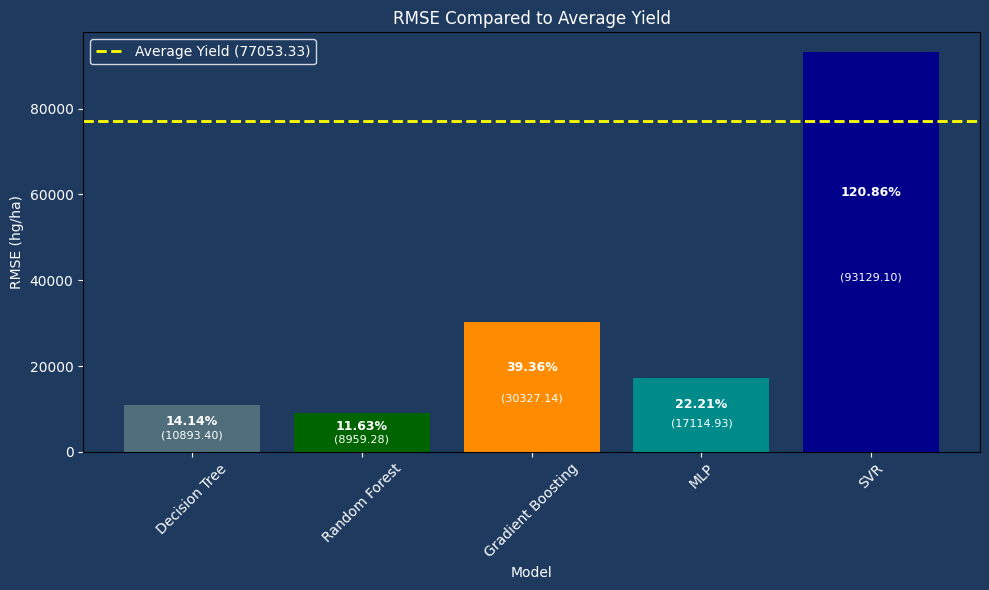

In [38]:
# Calculate the Average yield
average_yield = yield_df['hg/ha_yield'].mean()

# Extract RMSE values for the models
rmse_values = metrics_df[['Model', 'RMSE']].copy()
rmse_values = rmse_values.assign(RMSE_Percentage=(rmse_values['RMSE'] / average_yield) * 100)

# Display the average yield
print(f"Average Yield (hg/ha): {average_yield:.2f}\n")

# Compare average yield to RMSE values for each model
print("Model-wise RMSE Comparison:\n")
for index, row in rmse_values.iterrows():
    model = row['Model']
    rmse = row['RMSE']
    comparison = "lower" if rmse < average_yield else "higher"
    print(f"Model: {model}, RMSE: {rmse:.2f} ({comparison} than average yield)\n")

# Define custom colors for each model acc to slides
color_map = {
    'Decision Tree': '#4F6D7A',   # Blue-Gray
    'Random Forest': '#006400',   # True DarkGreen
    'Gradient Boosting': '#FF8C00',  # DarkOrange
    'MLP': '#008B8B',   # DarkCyan
    'SVR': '#00008B'    # DarkBlue
}

# Check if colors are defined correctly for each model
colors = [color_map.get(model, 'grey') for model in rmse_values['Model']]


# Plotting the RMSE values for each model
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#1E3A5F')  # figure background color
ax.set_facecolor('#1E3A5F')  # axes background color
bars = ax.bar(rmse_values['Model'], rmse_values['RMSE'], color=colors)
ax.set_xlabel('Model', color='white')
ax.set_ylabel('RMSE (hg/ha)', color='white')
ax.set_title('RMSE Compared to Average Yield', color='white')
ax.tick_params(colors='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Adding data labels to each bar (percentage and values)
for bar, percentage, rmse in zip(bars, rmse_values['RMSE_Percentage'], rmse_values['RMSE']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.65, f'{percentage:.2f}%', ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.45, f'({rmse:.2f})', ha='center', va='top', fontsize=8, color='white', fontweight='normal')

# Adding a value line for the average yield
ax.axhline(y=average_yield, color='yellow', linestyle='--', linewidth=2, label=f'Average Yield ({average_yield:.2f})')
ax.legend(facecolor='#1E3A5F', edgecolor='white', labelcolor='white')

plt.tight_layout()
plt.show()
